## 1. 트리 변환 

### 1.1 M-ary Tree 

###  'm-ary tree' 는 트리의 모든 내부 노드(잎새 노드(leaf)가 아닌 노드) 가 자식 노드를 최대 m 개를 갖는 트리를 말합니다. 
### (예) 
![Altext](./fig14-fig1_2.png)

### 트리 노드의 레벨(level)은 루트로 부터 해당 노드까지 단계별로 내려가면서 (올라 오는 것은 허용 안함) 도달하는 데 거치는 에지 갯수를 말합니다. 트리의 높이/깊이(height/depth)는 트리  잎새노드 레벨중 가장 큰 값을 말합니다.   상기 [그림 1] r과 [그림 2] 의 m-ary tree 의 깊이는  각각 4 와 5입니다.  

#### 다음은 13주 실습에서 학습했던 "M_ary_Node_Traversal2" 입니다. 

In [1]:
class M_ary_Node_Traversal2:
  # 노드 object 생성 초기화
    def __init__(self, data, m=2, distance=0): 

        self.children=[]   # 자식 노드(자식 서브트리)들 리스트
        self.m_ary=m  # 최대 허용 자식 노드  갯수  
        self.value = [data, distance]   # 자신(루트노드) 데이터 값(data) 및 루트노드로부터의 거리 distance 설정 
  
  # 자식 노드 갯수를 넘지 않는 범위에서 자식 노드를 생성하고 삽입 새 데이터 값을 노드 데이터값 으로 셋팅       
    def add_child(self, data, m=2, distance=1):  # interval_distance ; 부모노드로부터 자식노드까지의 거리        
        #print("data1={}, m1={}".format(data,m))
        #print("self.value=", self.value)
        queue=[]
        queue.append(self)
        while queue:
            current_exploring_node=queue.pop(0)            
            if current_exploring_node.value!=None:    
            #print("data2={}, m2={}".format(data,m))
                if len(current_exploring_node.children)< current_exploring_node.m_ary:           
                    current_exploring_node.children.append(M_ary_Node_Traversal2(data, m, current_exploring_node.value[1]+ distance))                
                    return 
                else: # 최대 허용 자식 노드 갯수를 넘었을 경우, 손자 노드를 생성
                    for i in range(current_exploring_node.m_ary):                   
                         
                        if (len(current_exploring_node.children[i].children)< current_exploring_node.children[i].m_ary):                            
                            current_exploring_node.children[i].children.append(M_ary_Node_Traversal2(data, m, current_exploring_node.children[i].value[1]+distance))
                            return 
                        queue.append(current_exploring_node.children[i])                
            else:           
                current_exploring_node.value = [data, distance]
        return 
    def remove_child(self, data):
        queue=[]        
        queue.append(self)
        while queue:
            test=queue.pop(0)               
            for i, node in enumerate(test.children):                
                if node.value[0]==data:                     
                    test.children.pop(i)
                    if test.children==[]:
                        del(test) 
                    return 1
                queue.append(node)
            
        return None
    def remove_all(self):      #자식 노드를 추가하지 않은 처음 루트노드 생성때로 돌아 감    
        if self.children==[]:           
            return 
        for node in self.children:           
            node.remove_all()
            #잎새 노도들 제거
            del(node.children)
            del(node.m_ary)
            del(node.value)
            del(node)
        self.children=[]   #자식 잎새노드들이 제거되었으면 부모 노드 가 자식이 없으므로 초기화   
        return
# 트리 노드 값들을 'preorder' 형식으로 출력 ('preorder' 형식은 깊이 우선 탐색임)
    def PrintTree(self):
        if self:
            print(self.value)
        for i in range(len(self.children)):         
            if self.children[i]:                
                self.children[i].PrintTree()      
# 이제, 트리 순회에 대해 살펴보자
# Preorder traversal ; Root -> Left ->Right
    def PreorderTraversal(self):
        res = []
        if self:
            res.append(self.value[0])
            for i in range(len(self.children)):
                if self.children[i]:
                    res = res + self.children[i].PreorderTraversal()
        return res

# Postorder traversal ; Left ->Right -> Root
    def PostorderTraversal(self):
        res = []
        if self:
            for i in range(len(self.children)):
                if self.children[i]:    
                    res = res + self.children[i].PostorderTraversal()
            res.append(self.value[0])
        return res    

# Inorder traversal ; Left -> Root -> Right
    def InorderTraversal(self):
        res = []
        if self:            
            if len(self.children)!=0:           
                res = res + self.children[0].InorderTraversal()
            res.append(self.value[0])
            for i in range(1, len(self.children)):
                if self.children[i]:
                    res = res + self.children[i].InorderTraversal()
            
        return res                    

In [2]:
MaryS1 = M_ary_Node_Traversal2('a')
MaryS1.add_child('b')
MaryS1.add_child('c')
MaryS1.add_child('d')
MaryS1.add_child('e')
MaryS1.add_child('f', 0)
MaryS1.add_child('g')
MaryS1.add_child('h', 0)
MaryS1.add_child('i', 1)
MaryS1.add_child('j', 1)
MaryS1.add_child('k', 0)
MaryS1.add_child('l', 0)
MaryS1.add_child('m', 0)
MaryS1.add_child('n', 0)
MaryS1.add_child('o', 0)  


In [3]:
print(MaryS1.PreorderTraversal())
print(MaryS1.PostorderTraversal())
print(MaryS1.InorderTraversal())

['a', 'b', 'd', 'h', 'i', 'n', 'e', 'j', 'o', 'k', 'c', 'f', 'g', 'l', 'm']
['h', 'n', 'i', 'd', 'o', 'j', 'k', 'e', 'b', 'f', 'l', 'm', 'g', 'c', 'a']
['h', 'd', 'n', 'i', 'b', 'o', 'j', 'e', 'k', 'a', 'f', 'c', 'l', 'g', 'm']


In [4]:
MaryS2 = M_ary_Node_Traversal2('a', 3)
MaryS2.add_child('b')
MaryS2.add_child('c', 0)
MaryS2.add_child('d', 3)
MaryS2.add_child('e')
MaryS2.add_child('f', 0)
MaryS2.add_child('g')
MaryS2.add_child('h', 0)
MaryS2.add_child('i', 0)
MaryS2.add_child('j', 0)
MaryS2.add_child('k', 3)
MaryS2.add_child('l', 0)
MaryS2.add_child('m')
MaryS2.add_child('n')
MaryS2.add_child('o', 0)  
MaryS2.add_child('p', 1)
MaryS2.add_child('q', 0)
MaryS2.add_child('r', 0)
MaryS2.add_child('s', 0)
MaryS2.add_child('t', 0)
MaryS2.add_child('u', 0)


In [5]:
print(MaryS2.PreorderTraversal())

['a', 'b', 'e', 'j', 'k', 'n', 's', 't', 'o', 'p', 'u', 'f', 'c', 'd', 'g', 'l', 'm', 'q', 'r', 'h', 'i']


### 1.2. 이진 탐색 트리 및 균형 이진 탐색 트리

####  이진 탐색 트리(Binary Search Tree)  는  노드간의 순서가 " left 자식 노드값 < root 노드 값 < right 자식 노드값 " 의 순서를 갖도록 정렬된  이진 트리(binary tree) 입니다.  예를 들어 [그림 1] 의 m-ary 트리, [그림 2]의 이진 트리를 이진 탐색  트리로 변경한 것은 각각 [그림  3], [그림 4]와 같습니다. 
![Altext](fig14-fig3_4.png)


#### 균형 이진 트리(Balanced Binary Tree) 는 루트 노드와 트리내 각 단말 노드까지의 거리들의 차이가 1 이하인 경을 말합니다.  [그림 1] 과 [그림 2]의 트리는 균형트리가 아니고, [그림 3] 과 [그림 4]의 트리는 균형트리입니다. 
####  이진 탐색 트리를 구축하는 데 있어서 '균형 이진 탐색 트리(balanced binary search tree)' 를 구축하는 것이 추후 탐색 횟수를 줄이는 데 도움이 됩니다.  주어진 노드 집합들에 대해 구성할 수있는  이진 탐색 트리 들중  균형 이진 탐색 트리가 가장 깊이가 작습니다.
####  깊이 $h$ 인 'full binary tree 의 총 노드 갯수  $V(h)$ 은 $V(h)=2^{h+1} -1 $  이므로, 총 노드 갯수 $m(=V(h))$ 개로 부터 구성할 수있는 트리들의 깊이중 최소 깊이는 'log<sub>2</sub><super>(m+1)</super>-1'  보다 큰 정수가운데, 최소 정수가 됩니다. 
#### m 개의 노드값이 주어졌을 때 (예; [그림 2]와 같이 {'a', 'b' , 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o'} 등의 15개 노드값), m 개의 노드값을 갖는 균형 이진 탐색 트리 의 깊이 'n'은 다음과 같이 구합니다. 
####  &nbsp;&nbsp;&nbsp;&nbsp;  h=min{ k >=log<sub>2</sub><super>(m+1)</super>-1 | k ; integer}  
####  m 개의 노드값이 주어졌을 때, 13주 실습에서 주어진, 상기 파이썬 'Class BTree_Node' 를 이용하여, 균형 이진 탐색 트리를 구성하는 방법의 하나는 다음과 같습니다.       
 1) 먼저 구성할 균형 이진 탐색 트리의 깊이 $'h' $을 구한 후에, 깊이 $'h-1'$ 의 균형 이진 탐색 트리(이 경우 완전 균형 트리임) 구성에  필요한 총노드수 $2^{h} -1$ 를 구한다.  
 2) 이후, m 개의 노드값에서 $2^{h} -1$ 개의 노드값을 적절히 뽑아, 깊이 $'h-1' $까지의 균형 이진 탐색 트리를 구성한다.   
 3) m 개의 노드값에서 뽑은 $2^{h} -1$ 개의 노드값을 뺀 나머지 노드값들은 구성된 깊이 'h-1' 의 균형 이진 탐색 트
    리의 루트노드의 'insert' 메소드를 이용하여 삽입하면 자동적으로 깊이 'h' 의 균형 이진 탐색 트리가 구성된다.

#### 예를 들어, 13주 실습에서 주어진, 상기 파이썬 'Class BTree_Node' 를 이용하여 구성된 상기 [그림 1]의 이진트리를   'Class Node' 를 이용하여 [그림 4]와 같은 깊이 'n' 인 균형 이진  탐색 트리로 구성하기 위해서는  깊이 'n-1' 의 완전 균형 이진 탐색 트리를 구성하기 위한, $2^{n} -1$  개의 노드 값 리스트를 먼저 구합니다.  즉, [그림 1]의 15개 노드값 ['a',  'b', ..., 'm', 'n', 'o'] 에대해, 7 (= 2^3-1)개  노드값 ['h', 'd', 'b', 'f', 'l', 'j', 'n'] 를 먼저 구하고, 이 노드 값들이 먼저 배치되고, 나머지 8개 노드값들이 배치되는 리스트 (예 ; ['h', 'd', 'b', 'f', 'l', 'j', 'n', 'a', 'c', 'e', 'g', 'i', 'k', 'm', 'o'] )를 구한 후에, 이 리스트의 첫 노드값을 갖는 루트 노드를 생성하고 (즉,  root=Node('h') ) , 이후  이 리스트의 값을 순차적으로 이 루트노트에 삽입하면됩니다. 
#### 즉,    
  <pre> 
   root=Node('h')
   root.insert('d') 
    .... 
  <code>   

####  생성된, 상기 파이썬 코드 'Class BTree_Node' 를 이용하여 구성한 노드 'm' 개의 트리의 노드값들이 Alphabet 문자열을 갖는다고 합시다([그림 1] 참조). 이러한 트리에 대해,  같은 갯수의 노드와 노드값을 갖는 균형 이진 탐색 트리를 구성해 봅시다. 

In [6]:
# 이진트리의 깊이 
from math import *
def depth_of_BBST(tree):
    m=len(tree.PreorderTraversal())
    print(m)
    return ceil(log2(m+1)-1)

In [7]:
depth_of_BBST(MaryS1)

15


3

In [8]:
depth_of_BBST(MaryS2)

21


4

In [9]:
from math import *
ceil(log2(22)-1)

4

In [10]:
from math import *
log2(22)

4.459431618637297

#### 다음은 13주 실습에서 학습했던 "class BTree_Traversal"  입니다. 

In [11]:
class BTree_Node_Traversal:
   # object 생성 초기화
    def __init__(self, data):
        self.parent = None
        self.left = None   # 왼쪽 서브트리 루트 노드값 설정
        self.right = None  # 오른쪽 서브트리 루트 노그값 설정 
        self.data = data   # 루트 노드 값  설정 

  # 삽입되는 새 값을  왼쪽 서브트리의 루트 노드값  또는 오른쪽 서브트리  루트노트값과 비교하여  적절한 위치에  노드를 생성하고 삽입 새 데이터 값을 
  # 노드값 으로 셋팅       
    def insert(self, data):
        if self.data:
            if data < self.data:
                if self.left is None:
                    self.left = BTree_Node_Traversal(data) ####
                else:
                    self.left.insert(data)                                        
            elif data > self.data:
                if self.right is None:
                    self.right = BTree_Node_Traversal(data) ####
                else:
                    self.right.insert(data)                    
        else:
            self.data = data
            self.parent=self
    def search(self, data, explored=[]): 
        explored.append(self.data)       
        if data < self.data:
            if self.left==None:
                return print("The tree does not have  the item({})".format(data))                      
            else:
                    self.left.search(data, explored)
        elif data > self.data:
            if self.right == None:
                return print("The tree does not have  the item({})".format(data))                      
            else:
                self.right.search(data, explored)
        else:         
            return print(explored)
# 트리 노드 값들을 프린팅
    def PrintTree(self):
        if self.left:
            self.left.PrintTree()
        print( self.data),
        if self.right:
            self.right.PrintTree()
            
          
 # Preorder traversal
# Root -> Left ->Right
    def PreorderTraversal(self):
        res = []
        if self:
            res.append(self.data)
            if self.left:
                res = res + self.left.PreorderTraversal()
            if self.right:    
                res = res + self.right.PreorderTraversal()
        return res

# Postorder traversal
# Left ->Right -> Root
    def PostorderTraversal(self):
        res = []
        if self:
            if self.left:
                res = self.left.PostorderTraversal()
            if self.right:    
                res = res + self.right.PostorderTraversal()
            res.append(self.data)
        return res    

# Inorder traversal
# Left -> Root -> Right
    def InorderTraversal(self):
        res = []
        if self:
            if self.left:
                res = self.left.InorderTraversal()
            res.append(self.data)
            if self.right:
                res = res + self.right.InorderTraversal()
        return res    

### 1.3. 균형 이진 탐색 트리로의 변환
####  이제, 상기 파이썬 코드 'Class Node' 를 이용하여 생성된 트리의 m 개 노드값들을 읽어서, 해당 노드값들을 갖는 균형 이진 탐색트리를 구성하는 데 필요한  (앞에서 설명한 바와 같은)를 노드값 리스트 를  구하는  파이썬 함수를 코딩한 후에 이를 이용하여  [그림 1]및 [그림 2] 의 트리에 대해 균형 이진 탐색 트리를 생성해 봅시다. 

In [12]:
from math import *

def depth_of_BBST(nodes): #
    m=len(nodes)
    return ceil(log2(m+1)-1)

def num_tree_nodes(depth):
    return 2**(depth+1)-1

def Select_from_BST_list(node_list): # node_list; 트리의 노드 리스트
    number=len(node_list) # 트리 노드 갯수 
    node_list.sort()   # 트리 노드를  정렬함 
    
    #정렬된 노드 리스트들로부터 균형 이진 탐색 트리구성을 위해, 트리 노드값 중 중앙값을 찾아 루트에 배치 
    bst=[] #균평 트리 노드 리스트
    start=0
    if number< 1:
        return bst
    end= number-1
    middle=(end-start+1)//2 # middle= 중앙 위치값 
    bst.append(node_list[middle]) # 중앙 위치의 노드 값이  먼저  균형 트리 노드 리스트에 등록 
    left=node_list[start:middle]    
    right=node_list[middle+1:end+1]    
    left_number = number//2
    if number%2==0:
        right_number=number//2 -1
    else: 
        right_number=number//2 
    
    bst+=Select_from_BST_list(left)    
    bst+=Select_from_BST_list(right)
 #   if len(bst)==number:
 #       return bst
    return bst


def To_BST(sel_node_list):
    bst_root=BTree_Node_Traversal(sel_node_list[0])
    for i in sel_node_list[1:]:
        bst_root.insert(i)
    return bst_root
        

In [13]:
a=MaryS1.PreorderTraversal()
a.sort()
a

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o']

In [14]:
Select_from_BST_list(MaryS1.PreorderTraversal())

['h', 'd', 'b', 'a', 'c', 'f', 'e', 'g', 'l', 'j', 'i', 'k', 'n', 'm', 'o']

In [15]:
sel_lst3=Select_from_BST_list(MaryS1.PreorderTraversal())
bst3=To_BST(sel_lst3)

####  상기에서  구성한 균형 이진 탐색 트리에 대해, 'Class Node' 의   'Inorder' 순회 함수를 적용한 결과가 
####  ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o'] 로 출력됨을 확인해 봅시다. 

In [16]:
print(bst3.PreorderTraversal())  # root - Left- Right ####
print(bst3.PostorderTraversal()) # Left - Right - root ####
print(bst3.InorderTraversal())   # Left-root-Right ####

['h', 'd', 'b', 'a', 'c', 'f', 'e', 'g', 'l', 'j', 'i', 'k', 'n', 'm', 'o']
['a', 'c', 'b', 'e', 'g', 'f', 'd', 'i', 'k', 'j', 'm', 'o', 'n', 'l', 'h']
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o']


In [17]:
sel_lst4=Select_from_BST_list(MaryS2.PreorderTraversal())
print(sel_lst4)
bst4=To_BST(sel_lst4)

['k', 'f', 'c', 'b', 'a', 'e', 'd', 'i', 'h', 'g', 'j', 'q', 'n', 'm', 'l', 'p', 'o', 't', 's', 'r', 'u']


####  상기에서  구성한 균형 이진 탐색 트리에 대해, 'Class Node' 의   'Inorder' 순회 함수를 적용한 결과가 
####  ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u'] 로 출력됨을 확인해 봅시다. 

In [18]:
print(bst4.PreorderTraversal())  # root - Left- Right ####
print(bst4.PostorderTraversal()) # Left - Right - root ####
print(bst4.InorderTraversal())   # Left-root-Right ####


['k', 'f', 'c', 'b', 'a', 'e', 'd', 'i', 'h', 'g', 'j', 'q', 'n', 'm', 'l', 'p', 'o', 't', 's', 'r', 'u']
['a', 'b', 'd', 'e', 'c', 'g', 'h', 'j', 'i', 'f', 'l', 'm', 'o', 'p', 'n', 'r', 's', 'u', 't', 'q', 'k']
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u']


#### 이제, 13주 실습에서 배운  트리의 깊이(depth)를 구하는 파이썬 함수를 적용하여 앞에서 구성한 [그림 3] 및 [그림 4]의  균형 이진 탐색 트리의 깊이가 3 및 4임을 확인해 봅시다.

In [19]:
def Tree_depth(root, length=0):
    tree_depth =0   
    if root:
        length +=1
        tree_depth = Tree_depth(root.left, length)        
        if tree_depth < Tree_depth(root.right, length):
                tree_depth=Tree_depth(root.right, length)
    if tree_depth < length - 1:            
        tree_depth = length-1
        
    return tree_depth  

In [20]:
print(Tree_depth(bst3))
print(Tree_depth(bst4))

3
4


## 2. Spanning Tree

#### 그래프에서 지정된 소스 노드로부터 의 신장트리 한개를 깊이 우선 탐색 기반 으로  구해 보기

In [29]:
import copy
def find_SpanningTree_by_dfs2(graph, start, edges=[]):  #graph ; 인접 노드 목록 그래프 표현, #start ;  시작 노드, edges=탐색된 에지 리스트   
    #print("Beginning;  start={}, edges={}".format(start, edges))   
    if not start in graph: #시작노드가 그래프 노드 가 아니면 문제 있음 
        return None    
    
    
    for w in graph[start]: # (3) 시작노드들의 인접 노드들에 대해 for looping  
        #print("After For Loop;  w={}, start={}, edges={}".format(w, start, edges))
        explored=[]
        if edges!=[]:
            explored=[edges[0][0]] # edges[0]=(S,B); 첫번째 탐색 에지. 에지는 (시작노드, 종착노드) 로 구성. 따라서, edges[0][0] 은 첫번째 에지의 시작노드 
            for item in edges:
                explored.append(item[1])  #item은 에지.(S,B) item[1]은 종착노드 B
            #explored=['S', 'B']
        else:
            if start not in explored:
                explored=explored+[start]   # start 가 탐색된 노드 리스트에 없으면 추가
  
        if w not in explored:   
            #print("2After For Loop;  w={}, start={}, explored={}".format(w, start, explored))     
            if explored!=[]: #["S','B']"] //edgds=[(S, B)]
                if (explored[-1], w) in edges or (w, explored[-1]) in edges:          
                    return edges                 
                else:
                    if edges==[]:
                        edges.append((explored[-1], w))  
                    elif edges!=[] and edges[-1][1]!=w and edges[-1][0] not in explored: #w 가 탐색 에지의 종착 노드가 아니면   ('S', 'B') edges=[('S', 'B'),..,(F,E) ]}                  
                        edges.append((explored[-1], w)) #(B,F)    
                    else:    
                        edges.append((start, w)) #(B,F)    
            #print("w={} at graph[{}], explored={},  edges={}".format(w, start, explored+[w], edges))             
            edges=find_SpanningTree_by_dfs2(graph, w, edges)  # (5)계속해서 깊이 탐색해 들어감             

        if len(edges)== len(graph)-1:        
            break 
    #print("w={} at graph[{}], explored={},  edges={}".format(w, start, explored, edges))    
    return edges

![Alttext](fig14-5.png)
#### 상기 [그림 5]에 대해서 신장트리를 구해 봅시다. 

In [30]:
graph5 = {
       'B': ['F', 'L', 'N', 'S'],
       'E': ['F', 'L'],
       'F': ['B', 'E', 'L', 'N'],  
       'L': ['B', 'E', 'F', 'S'],
       'N': ['B', 'F', 'S'],
       'S': ['B', 'L', 'N']}
graph5

{'B': ['F', 'L', 'N', 'S'],
 'E': ['F', 'L'],
 'F': ['B', 'E', 'L', 'N'],
 'L': ['B', 'E', 'F', 'S'],
 'N': ['B', 'F', 'S'],
 'S': ['B', 'L', 'N']}

In [31]:
find_SpanningTree_by_dfs2(graph5, 'S', [])

[('S', 'B'), ('B', 'F'), ('F', 'E'), ('E', 'L'), ('F', 'N')]

![Alttext](fig14-5_12.png)

![Alttext](fig14-5e.png)
#### 상기 [그림 5e]에 대해서 신장트리를 구해 봅시다. 

In [32]:
graph5e = {
       'B': ['F', 'L', 'N', 'S'],
       'E': ['F', 'L', 'U'],
       'F': ['B', 'E', 'L', 'N', 'U'],  
       'L': ['B', 'E', 'F', 'S'],
       'N': ['B', 'F', 'S'],
       'S': ['B', 'L', 'N'],
       'U': ['E', 'F']}
graph5e

{'B': ['F', 'L', 'N', 'S'],
 'E': ['F', 'L', 'U'],
 'F': ['B', 'E', 'L', 'N', 'U'],
 'L': ['B', 'E', 'F', 'S'],
 'N': ['B', 'F', 'S'],
 'S': ['B', 'L', 'N'],
 'U': ['E', 'F']}

In [34]:
find_SpanningTree_by_dfs2(graph5e, 'S', [])

[('S', 'B'), ('B', 'F'), ('F', 'E'), ('E', 'L'), ('E', 'U'), ('F', 'N')]

![Altext](fig14-5e-sol.png)

### 다음의 교과서 예제 Fig. 6 의 그래프에서 노드 "f' 에서 출발하는 신장 트리를 구해 봅시다. 
![Alttext](fig14-67.png)

In [35]:
graph6 = {
       'a': ['c'],
       'b': ['c'],
       'c': ['a', 'b', 'e'],
       'd': ['e', 'f'],  
       'e': ['c', 'd', 'f'],
       'f': ['d', 'e', 'g', 'h'],
       'g': ['f', 'h'],
       'h': ['f', 'g', 'i', 'k'], 
       'i': ['h'],
       'j': ['k'],
       'k': ['h', 'j']    
      }
graph6

{'a': ['c'],
 'b': ['c'],
 'c': ['a', 'b', 'e'],
 'd': ['e', 'f'],
 'e': ['c', 'd', 'f'],
 'f': ['d', 'e', 'g', 'h'],
 'g': ['f', 'h'],
 'h': ['f', 'g', 'i', 'k'],
 'i': ['h'],
 'j': ['k'],
 'k': ['h', 'j']}

In [36]:
find_SpanningTree_by_dfs2(graph6, 'f', [])

[('f', 'd'),
 ('d', 'e'),
 ('e', 'c'),
 ('c', 'a'),
 ('c', 'b'),
 ('f', 'g'),
 ('g', 'h'),
 ('h', 'i'),
 ('h', 'k'),
 ('k', 'j')]

In [37]:
graph7 = {
       'a': ['c'],
       'b': ['c'],
       'c': ['a', 'b', 'e'],
       'd': ['e', 'f'],  
       'e': ['c', 'd', 'f'],
       'f': ['g','d', 'e', 'h'],
       'g': ['f', 'h'],
       'h': ['f', 'g', 'k', 'i'], 
       'i': ['h'],
       'j': ['k'],
       'k': ['h', 'j']    
      }
graph7

{'a': ['c'],
 'b': ['c'],
 'c': ['a', 'b', 'e'],
 'd': ['e', 'f'],
 'e': ['c', 'd', 'f'],
 'f': ['g', 'd', 'e', 'h'],
 'g': ['f', 'h'],
 'h': ['f', 'g', 'k', 'i'],
 'i': ['h'],
 'j': ['k'],
 'k': ['h', 'j']}

In [38]:
find_SpanningTree_by_dfs2(graph7, 'f', [])

[('f', 'g'),
 ('g', 'h'),
 ('h', 'k'),
 ('k', 'j'),
 ('h', 'i'),
 ('f', 'd'),
 ('d', 'e'),
 ('e', 'c'),
 ('c', 'a'),
 ('c', 'b')]

## 실습1:

####  다음  [그림 6] 의 트리를 읽어,  [그림 4] 의 균형 이진 탐색 트리로 변환하고자 한다. 다음에 답하시오.  
![Altext](fig14-6.png)

### (a). [그림 6] 의 3-ary 트리를 생성하는 파이썬 코드를 작성해 보시오. 

In [39]:
class M_ary_Node_Traversal2:
  # 노드 object 생성 초기화
    def __init__(self, data, m=2, distance=0): 

        self.children=[]   # 자식 노드(자식 서브트리)들 리스트
        self.m_ary=m  # 최대 허용 자식 노드  갯수  
        self.value = [data, distance]   # 자신(루트노드) 데이터 값(data) 및 루트노드로부터의 거리 distance 설정 
  
  # 자식 노드 갯수를 넘지 않는 범위에서 자식 노드를 생성하고 삽입 새 데이터 값을 노드 데이터값 으로 셋팅       
    def add_child(self, data, m=2, distance=1):  # interval_distance ; 부모노드로부터 자식노드까지의 거리        
        #print("data1={}, m1={}".format(data,m))
        #print("self.value=", self.value)
        queue=[]
        queue.append(self)
        while queue:
            current_exploring_node=queue.pop(0)            
            if current_exploring_node.value!=None:    
            #print("data2={}, m2={}".format(data,m))
                if len(current_exploring_node.children)< current_exploring_node.m_ary:           
                    current_exploring_node.children.append(M_ary_Node_Traversal2(data, m, current_exploring_node.value[1]+ distance))                
                    return 
                else: # 최대 허용 자식 노드 갯수를 넘었을 경우, 손자 노드를 생성
                    for i in range(current_exploring_node.m_ary):                   
                         
                        if (len(current_exploring_node.children[i].children)< current_exploring_node.children[i].m_ary):                            
                            current_exploring_node.children[i].children.append(M_ary_Node_Traversal2(data, m, current_exploring_node.children[i].value[1]+distance))
                            return 
                        queue.append(current_exploring_node.children[i])                
            else:           
                current_exploring_node.value = [data, distance]
        return 
    def remove_child(self, data):
        queue=[]        
        queue.append(self)
        while queue:
            test=queue.pop(0)               
            for i, node in enumerate(test.children):                
                if node.value[0]==data:                     
                    test.children.pop(i)
                    if test.children==[]:
                        del(test) 
                    return 1
                queue.append(node)
            
        return None
    def remove_all(self):      #자식 노드를 추가하지 않은 처음 루트노드 생성때로 돌아 감    
        if self.children==[]:           
            return 
        for node in self.children:           
            node.remove_all()
            #잎새 노도들 제거
            del(node.children)
            del(node.m_ary)
            del(node.value)
            del(node)
        self.children=[]   #자식 잎새노드들이 제거되었으면 부모 노드 가 자식이 없으므로 초기화   
        return
# 트리 노드 값들을 'preorder' 형식으로 출력 ('preorder' 형식은 깊이 우선 탐색임)
    def PrintTree(self):
        if self:
            print(self.value)
        for i in range(len(self.children)):         
            if self.children[i]:                
                self.children[i].PrintTree()      
# 이제, 트리 순회에 대해 살펴보자
# Preorder traversal ; Root -> Left ->Right
    def PreorderTraversal(self):
        res = []
        if self:
            res.append(self.value[0])
            for i in range(len(self.children)):
                if self.children[i]:
                    res = res + self.children[i].PreorderTraversal()
        return res

# Postorder traversal ; Left ->Right -> Root
    def PostorderTraversal(self):
        res = []
        if self:
            for i in range(len(self.children)):
                if self.children[i]:    
                    res = res + self.children[i].PostorderTraversal()
            res.append(self.value[0])
        return res    

# Inorder traversal ; Left -> Root -> Right
    def InorderTraversal(self):
        res = []
        if self:            
            if len(self.children)!=0:           
                res = res + self.children[0].InorderTraversal()
            res.append(self.value[0])
            for i in range(1, len(self.children)):
                if self.children[i]:
                    res = res + self.children[i].InorderTraversal()
            
        return res                    

In [43]:
Mary6 = M_ary_Node_Traversal2('a', 3)
Mary6.add_child('b', 3)
Mary6.add_child('c', 0)
Mary6.add_child('d', 3)
Mary6.add_child('e',3)
Mary6.add_child('f', 0)
Mary6.add_child('g',1)
Mary6.add_child('h', 1)
Mary6.add_child('i', 0)
Mary6.add_child('j')
Mary6.add_child('k', 0)
Mary6.add_child('l', 0)
Mary6.add_child('m',0)
Mary6.add_child('n')
Mary6.add_child('o', 0)  
Mary6.add_child('p', 1)
Mary6.add_child('q', 0)
Mary6.add_child('r', 0)
Mary6.add_child('s', 0)

In [44]:
len(Mary6.PreorderTraversal())

19

### (b). [그림 6]의 3-ary 트리의 깊이(높이)가 4이다. 이를 '균형 이진 탐색 트리'(BBST)로 변형하는 경우에, 해당 BBST를 생성하는 파이썬 코드를 작성해 보시오

In [40]:
class BTree_Node_Traversal:
   # object 생성 초기화
    def __init__(self, data):
        self.parent = None
        self.left = None   # 왼쪽 서브트리 루트 노드값 설정
        self.right = None  # 오른쪽 서브트리 루트 노그값 설정 
        self.data = data   # 루트 노드 값  설정 

  # 삽입되는 새 값을  왼쪽 서브트리의 루트 노드값  또는 오른쪽 서브트리  루트노트값과 비교하여  적절한 위치에  노드를 생성하고 삽입 새 데이터 값을 
  # 노드값 으로 셋팅       
    def insert(self, data):
        if self.data:
            if data < self.data:
                if self.left is None:
                    self.left = BTree_Node_Traversal(data) ####
                else:
                    self.left.insert(data)                                        
            elif data > self.data:
                if self.right is None:
                    self.right = BTree_Node_Traversal(data) ####
                else:
                    self.right.insert(data)                    
        else:
            self.data = data
            self.parent=self
    def search(self, data, explored=[]): 
        explored.append(self.data)       
        if data < self.data:
            if self.left==None:
                return print("The tree does not have  the item({})".format(data))                      
            else:
                    self.left.search(data, explored)
        elif data > self.data:
            if self.right == None:
                return print("The tree does not have  the item({})".format(data))                      
            else:
                self.right.search(data, explored)
        else:         
            return print(explored)
# 트리 노드 값들을 프린팅
    def PrintTree(self):
        if self.left:
            self.left.PrintTree()
        print( self.data),
        if self.right:
            self.right.PrintTree()
            
          
 # Preorder traversal
# Root -> Left ->Right
    def PreorderTraversal(self):
        res = []
        if self:
            res.append(self.data)
            if self.left:
                res = res + self.left.PreorderTraversal()
            if self.right:    
                res = res + self.right.PreorderTraversal()
        return res

# Postorder traversal
# Left ->Right -> Root
    def PostorderTraversal(self):
        res = []
        if self:
            if self.left:
                res = self.left.PostorderTraversal()
            if self.right:    
                res = res + self.right.PostorderTraversal()
            res.append(self.data)
        return res    

# Inorder traversal
# Left -> Root -> Right
    def InorderTraversal(self):
        res = []
        if self:
            if self.left:
                res = self.left.InorderTraversal()
            res.append(self.data)
            if self.right:
                res = res + self.right.InorderTraversal()
        return res    

In [41]:
from math import *

def depth_of_BBST(nodes): #
    m=len(nodes)
    return ceil(log2(m+1)-1)

def num_tree_nodes(depth):
    return 2**(depth+1)-1

def Select_from_BST_list(node_list): # node_list; 트리의 노드 리스트
    number=len(node_list) # 트리 노드 갯수 
    node_list.sort()   # 트리 노드를  정렬함 
    
    #정렬된 노드 리스트들로부터 균형 이진 탐색 트리구성을 위해, 트리 노드값 중 중앙값을 찾아 루트에 배치 
    bst=[] #균평 트리 노드 리스트
    start=0
    if number< 1:
        return bst
    end= number-1
    middle=(end-start+1)//2 # middle= 중앙 위치값 
    bst.append(node_list[middle]) # 중앙 위치의 노드 값이  먼저  균형 트리 노드 리스트에 등록 
    left=node_list[start:middle]    
    right=node_list[middle+1:end+1]    
    left_number = number//2
    if number%2==0:
        right_number=number//2 -1
    else: 
        right_number=number//2 
    
    bst+=Select_from_BST_list(left)    
    bst+=Select_from_BST_list(right)
 #   if len(bst)==number:
 #       return bst
    return bst


def To_BST(sel_node_list):
    bst_root=BTree_Node_Traversal(sel_node_list[0])
    for i in sel_node_list[1:]:
        bst_root.insert(i)
    return bst_root


In [45]:
sel_lst6=Select_from_BST_list(Mary6.PreorderTraversal())
bst6=To_BST(sel_lst6)

In [46]:
sel_lst6

['j',
 'e',
 'c',
 'b',
 'a',
 'd',
 'h',
 'g',
 'f',
 'i',
 'o',
 'm',
 'l',
 'k',
 'n',
 'r',
 'q',
 'p',
 's']

### (c)  생성한 '균형 이진 탐색 트리(BBST)'에 대해 Inorder 순회로 하는 경우에 , 알파벳순으로 출력됨을 보이시오.

In [47]:
bst6.InorderTraversal()

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's']

### (d) 상기 생성된  '균형 이진 탐색 트리(BBST)'를 NetworkX를 사용하여 그려보시오. 

In [49]:
def edges_in_tree(tree, edges=[]):
    if tree.data == None:
        return  []    
    edges, left_edges, right_edges = list(), list(), list() 

    if tree.left != None:            
        edges.append((tree.data, tree.left.data))
        left_edges= edges_in_tree(tree.left, edges)        
    if tree.right != None:       
        edges.append((tree.data, tree.right.data))
        right_edges=edges_in_tree(tree.right, edges)
        
    return edges + left_edges + right_edges

In [50]:
edges_in_tree(bst6)

[('j', 'e'),
 ('j', 'o'),
 ('e', 'c'),
 ('e', 'h'),
 ('c', 'b'),
 ('c', 'd'),
 ('b', 'a'),
 ('h', 'g'),
 ('h', 'i'),
 ('g', 'f'),
 ('o', 'm'),
 ('o', 'r'),
 ('m', 'l'),
 ('m', 'n'),
 ('l', 'k'),
 ('r', 'q'),
 ('r', 's'),
 ('q', 'p')]

In [51]:
import networkx as nx
import matplotlib.pyplot as plt

In [52]:
def draw_balanced_binary_search_tree(BBT_tree, pos = None) :
    G = nx.Graph()
    nodes = BBT_tree.InorderTraversal()
    edges = edges_in_tree(BBT_tree)
   
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)

    
    plt.figure(figsize=(10, 10))
    
    nx.draw_networkx_nodes(G, pos=pos, node_size=2000, node_color="g",)
    nx.draw_networkx_edges(G, pos=pos)
    nx.draw_networkx_labels(G, pos=pos, font_size=30)
    plt.show()

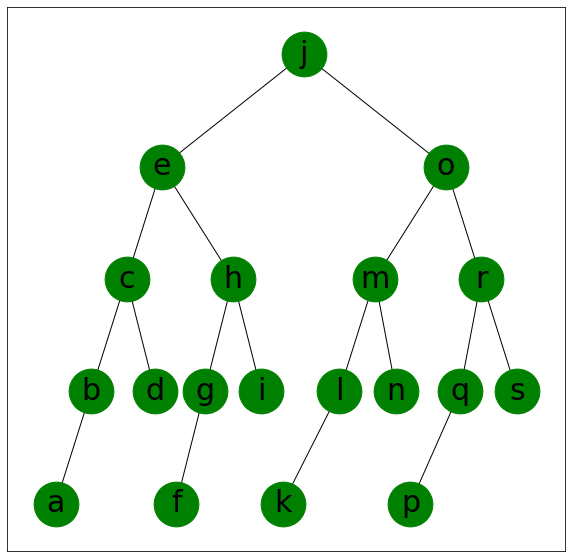

In [53]:
pos = {'a':(-3.5, 0), 'b':(-3,1), 'c':(-2.5, 2), 'd':(-2.1,1), 'e':(-2, 3), 'f':(-1.8, 0), 'g':(-1.4, 1), 'h':(-1.0, 2), 'i':(-0.6,1), 'j':(0,4), 'k':(-0.3, 0),
      'l':(0.5, 1),'m':(1,2),'n':(1.3, 1),'o':(2,3),'p':(1.5, 0),'q':(2.2, 1),'r':(2.5, 2), 's':(3,1)}
draw_balanced_binary_search_tree(bst6, pos) 

## 실습 2: 
### (a) 너비 우선 탐색으로 주어진 그래프에서 주어진 소스 노드에서의 신장 트리 하나를 찾는 파이썬 코드를 작성하시오. 

In [54]:
import copy
def find_SpanningTree_by_bfs(graph, start, edges=[]): 
    graph_nodes= list(graph.keys())
    explored, edges, queue = list(), list(), [start]
    explored.append(start)
    while queue: #탐색할 큐에 노드가 있는 한 계속 수행  
        v = queue.pop(0)  # 큐에서  FIFO 순으로 큐의 제일앞에 있는 노드을  뽑음
        for w in graph[v]:   #현재 노드 v 의 인접 모드들에 대해 for looping        
            if w not in explored:                
                explored.append(w) #현 노드가 순회되지 않았으면 현 노드를 순회된 리스트에 등록               
                if (v,w) not in edges and (w,v) not in edges:              #if (v,w) not in edges :    
                    edges.append((v, w))
                    if len(edges)==len(graph) and explored.sort()==graph_nodes:
                        return edges  
                    #else: edges.pop(-1)
                queue.append(w) # 다음 레벨 탐색을 위해  큐에 해당 노드 를 저장함
    return edges

### (b) 상기 너비우선 탐색 기반 신장트리 검출 파이썬 코드를 이용하여 [그림 5] 의 그래프에서 노드 "S" 에서 출발하는 신장 트리를 하나 구해 보시오.

In [55]:
graph5 = {
       'B': ['F', 'L', 'N', 'S'],
       'E': ['F', 'L'],
       'F': ['B', 'E', 'L', 'N'],  
       'L': ['B', 'E', 'F', 'S'],
       'N': ['B', 'F', 'S'],
       'S': ['B', 'L', 'N']}
graph5

{'B': ['F', 'L', 'N', 'S'],
 'E': ['F', 'L'],
 'F': ['B', 'E', 'L', 'N'],
 'L': ['B', 'E', 'F', 'S'],
 'N': ['B', 'F', 'S'],
 'S': ['B', 'L', 'N']}

In [56]:
find_SpanningTree_by_bfs(graph5, 'S') 

[('S', 'B'), ('S', 'L'), ('S', 'N'), ('B', 'F'), ('L', 'E')]

![Alttext](fig14-5_3.png)

### (c) 상기 너비우선 탐색 기반 신장트리 검출 파이썬 코드를 이용하여,  교과서 예제 Fig. 6 의 그래프에서 노드 "f' 에서 출발하는 신장 트리를 구해 보시오.

![Alttext](fig14_sol3.png)

In [ ]:
graph6 = {
       'a': ['c'],
       'b': ['c'],
       'c': ['a', 'b', 'e'],
       'd': ['e', 'f'],  
       'e': ['c', 'd', 'f'],
       'f': ['d', 'e', 'g', 'h'],
       'g': ['f', 'h'],
       'h': ['f', 'g', 'i', 'k'], 
       'i': ['h'],
       'j': ['k'],
       'k': ['h', 'j']    
      }
graph6

In [57]:
find_SpanningTree_by_bfs(graph6, 'f') 

[('f', 'd'),
 ('f', 'e'),
 ('f', 'g'),
 ('f', 'h'),
 ('e', 'c'),
 ('h', 'i'),
 ('h', 'k'),
 ('c', 'a'),
 ('c', 'b'),
 ('k', 'j')]